In [1]:
import os
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import progressbar
import time
import datetime
import re

In [2]:
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline

# Import

In [3]:
phishlist = pd.read_csv('d/SWITCHphishes.csv')

# Dates

In [4]:
#Looking into date
def clean(date):
    return date.replace('on ','').strip().replace('th','').replace('rd','').replace('nd','').replace('st','')
phishlist['Date'] = phishlist['Date'].apply(clean)

In [5]:
phishlist[phishlist['Date']=='-protection.net/id3130.php']

,Date,ID,URL,Valid Phish


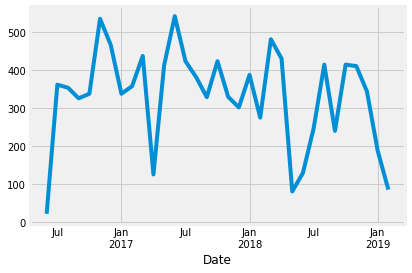

In [6]:
phishlist = phishlist[phishlist['Date']!='-protection.net/id3130.php']
#Dates
phishlist.index = pd.to_datetime(phishlist['Date'], format='%b %d %Y %I:%M %p')
phishlist.resample('M')['ID'].count().plot()

Looking into beginning of the list

In [8]:
phishlist.resample('M')['ID'].count().head()

Date
2016-06-30     21
2016-07-31    362
2016-08-31    354
2016-09-30    326
2016-10-31    338
Freq: M, Name: ID, dtype: int64

And the end

In [9]:
phishlist.resample('M')['ID'].count().tail()

Date
2018-10-31    415
2018-11-30    411
2018-12-31    344
2019-01-31    188
2019-02-28     85
Freq: M, Name: ID, dtype: int64

Total

In [10]:
phishlist['URL'].count()

10939

Total Valid Phish

In [11]:
phishlist['Valid Phish'].value_counts()

Unknown        7629
VALID PHISH    3295
INVALID          15
Name: Valid Phish, dtype: int64

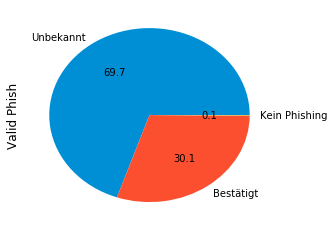

In [12]:
labels = ['Unbekannt', 'Bestätigt','Kein Phishing'] 
phishlist['Valid Phish'].value_counts().plot(kind='pie', figsize=(4,4), autopct='%.1f', labels=labels)

Welche Sites wurden falsch von GovCert eingegeben?

In [13]:
phishlist[phishlist['Valid Phish']=='INVALID']

,Date,ID,URL,Valid Phish
Date,,,,
2017-07-27 04:53:00,Jul 27 2017 4:53 AM,5120236,https://www.ricardo.ch/,INVALID
2017-01-25 06:45:00,Jan 25 2017 6:45 AM,4767282,http://www.bfe.admin.ch/,INVALID
2018-01-08 11:04:00,Jan 8 2018 11:04 AM,5417008,http://veaulecoup.com/terms-condition/,INVALID
2018-09-26 16:58:00,Sep 26 2018 4:58 PM,5796240,http://teverganadeasfaltos.es/,INVALID
2018-09-26 16:58:00,Sep 26 2018 4:58 PM,5796239,http://domeneshop.no.teverganadeasfaltos.es/,INVALID
2018-10-22 14:36:00,Oct 22 2018 2:36 PM,5822617,https://banking.credem.it/newvir/login/login,INVALID
2017-11-16 07:50:00,Nov 16 2017 7:50 AM,5336172,https://sellercentral.amazon.de/ap/signin?open...,INVALID
2018-08-27 12:39:00,Aug 27 2018 12:39 PM,5764536,http://blocked.transip.nl/,INVALID
2018-08-22 05:45:00,Aug 22 2018 5:45 AM,5758904,http://14.141.113.33/FeMvoPPjFZwrE/FPu2Yew5XHa...,INVALID


# Banking
Welche Banken sind davon betroffen. Zunächst mal die UBS an schauen. Auffällig, dass besonders viele UBS darunter sind. 

In [14]:
#Looking into URLs
phishlist['URL'].value_counts().head()

http://chiricopropiedades.com.ar/images/DatePager/id/fr-fr/security/ma...    4
https://vigilantevapers.com/skin/adminhtml/default/default/xmlconnect/...    4
http://www.wiselane.com/xx/nz.co.https.ssl.config/authentification/aut...    4
http://haikmaty.beget.tech/29701127885238879423558/5032588751124475536...    3
https://www.westernunion.com.fr.fr.send-money.app.login.sureshzaveri.c...    3
Name: URL, dtype: int64

In [15]:
#Looking for ubs
def small(elem):
    elem = elem.lower()
    return elem

In [16]:
phishlist['URL'] = phishlist['URL'].apply(small)

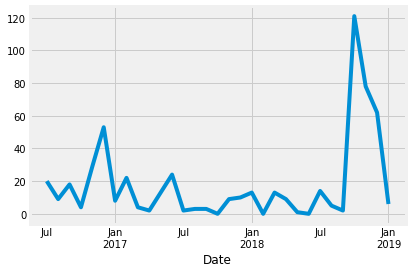

In [17]:
phishlist['ubs'] = phishlist['URL'].str.contains('ubs')
ubs = phishlist[phishlist['ubs']==True]
ubs.resample('M')['ID'].count().plot()

In [18]:
pd.DataFrame(ubs.resample('M')['ID'].count())

,ID
Date,
2016-07-31,20
2016-08-31,9
2016-09-30,18
2016-10-31,4
2016-11-30,29
2016-12-31,53
2017-01-31,8
2017-02-28,22
2017-03-31,4


In [19]:
ubs.head()

,Date,ID,URL,Valid Phish,ubs
Date,,,,,
2016-08-02 04:49:00,Aug 2 2016 4:49 AM,4336659,http://ebanking.mastercard.ch1.ubs.com.servers...,VALID PHISH,True
2016-08-01 07:55:00,Aug 1 2016 7:55 AM,4330793,http://exatactical.com/errors/ubs1.htm,Unknown,True
2016-08-01 07:54:00,Aug 1 2016 7:54 AM,4330792,http://thatcheappainter.net/errors/ubs.php,Unknown,True
2016-07-31 18:12:00,Jul 31 2016 6:12 PM,4330253,http://ebanking.mastercard.ch1.ubs.com.workben...,Unknown,True
2018-11-21 13:18:00,Nov 21 2018 1:18 PM,5850247,http://178.128.199.11/414/a94ff/karte.htm?http...,Unknown,True


In [20]:
ubs['URL'].count()

557

In [21]:
ubs

,Date,ID,URL,Valid Phish,ubs
Date,,,,,
2016-08-02 04:49:00,Aug 2 2016 4:49 AM,4336659,http://ebanking.mastercard.ch1.ubs.com.servers...,VALID PHISH,True
2016-08-01 07:55:00,Aug 1 2016 7:55 AM,4330793,http://exatactical.com/errors/ubs1.htm,Unknown,True
2016-08-01 07:54:00,Aug 1 2016 7:54 AM,4330792,http://thatcheappainter.net/errors/ubs.php,Unknown,True
2016-07-31 18:12:00,Jul 31 2016 6:12 PM,4330253,http://ebanking.mastercard.ch1.ubs.com.workben...,Unknown,True
2018-11-21 13:18:00,Nov 21 2018 1:18 PM,5850247,http://178.128.199.11/414/a94ff/karte.htm?http...,Unknown,True
2018-11-21 07:13:00,Nov 21 2018 7:13 AM,5849956,http://178.128.199.11/414/a2ae8/karte.htm?http...,Unknown,True
2016-12-02 08:43:00,Dec 2 2016 8:43 AM,4654624,http://6s1.ecolestpr.be/ubs/card.php,Unknown,True
2016-12-02 08:43:00,Dec 2 2016 8:43 AM,4654623,http://6s1.ecolestpr.be/ubs/,Unknown,True
2016-12-02 08:25:00,Dec 2 2016 8:25 AM,4654612,http://r9wjwfppwi41.stokkelblad.be/ubs/card.ph...,Unknown,True


In [22]:
phishlist['URL'].count()

10939

In [23]:
phishlist['2018-10'].count()

Date           415
ID             415
URL            415
Valid Phish    415
ubs            415
dtype: int64

In [24]:
ubs['URL'].count()

557

In [25]:
print("Anteil der UBS phishing-Sites ist hoch:", round(ubs['URL'].count() / phishlist['URL'].count() * 100 , 1), "%")

Anteil der UBS phishing-Sites ist hoch: 5.1 %


Und steht es mit den validierten Phishing-Sites?

In [26]:
ubs[ubs['Valid Phish']=='VALID PHISH']['URL'].count()

211

In [27]:
ubs[ubs['Valid Phish']=='VALID PHISH'].head()

,Date,ID,URL,Valid Phish,ubs
Date,,,,,
2016-08-02 04:49:00,Aug 2 2016 4:49 AM,4336659,http://ebanking.mastercard.ch1.ubs.com.servers...,VALID PHISH,True
2016-11-04 07:03:00,Nov 4 2016 7:03 AM,4578453,http://www.genebar.ch/img/ubs/2016/activation/...,VALID PHISH,True
2016-11-19 08:54:00,Nov 19 2016 8:54 AM,4623367,http://www.whatsapp-subscribes-messanger.org/p...,VALID PHISH,True
2018-11-21 16:35:00,Nov 21 2018 4:35 PM,5850507,http://login59gj.impresaproductions.com/ubs/us...,VALID PHISH,True
2018-11-21 16:35:00,Nov 21 2018 4:35 PM,5850506,http://login4.quinnlew.com/ubs/usb/,VALID PHISH,True


In [28]:
ubs[ubs['Valid Phish']=='Unknown'].head()

,Date,ID,URL,Valid Phish,ubs
Date,,,,,
2016-08-01 07:55:00,Aug 1 2016 7:55 AM,4330793,http://exatactical.com/errors/ubs1.htm,Unknown,True
2016-08-01 07:54:00,Aug 1 2016 7:54 AM,4330792,http://thatcheappainter.net/errors/ubs.php,Unknown,True
2016-07-31 18:12:00,Jul 31 2016 6:12 PM,4330253,http://ebanking.mastercard.ch1.ubs.com.workben...,Unknown,True
2018-11-21 13:18:00,Nov 21 2018 1:18 PM,5850247,http://178.128.199.11/414/a94ff/karte.htm?http...,Unknown,True
2018-11-21 07:13:00,Nov 21 2018 7:13 AM,5849956,http://178.128.199.11/414/a2ae8/karte.htm?http...,Unknown,True


In [29]:
ubs.to_csv('ubs.csv')

# Telecom

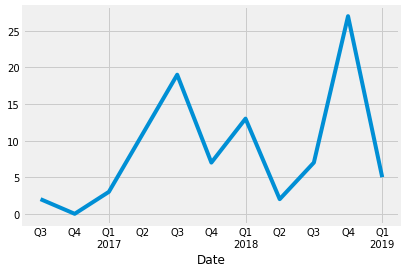

In [30]:
phishlist['sunrise'] = phishlist['URL'].str.contains('sunrise')
sunrise = phishlist[phishlist['sunrise']==True]
sunrise.resample('Q')['ID'].count().plot()

In [31]:
pd.DataFrame(sunrise.resample('Q')['ID'].count())

,ID
Date,
2016-09-30,2
2016-12-31,0
2017-03-31,3
2017-06-30,11
2017-09-30,19
2017-12-31,7
2018-03-31,13
2018-06-30,2
2018-09-30,7


In [32]:
sunrise['sunrise'].count()

96

In [33]:
sunrise

,Date,ID,URL,Valid Phish,ubs,sunrise
Date,,,,,,
2017-09-18 12:22:00,Sep 18 2017 12:22 PM,5222649,http://sunrise.anmelden.online/,Unknown,False,True
2018-11-20 11:33:00,Nov 20 2018 11:33 AM,5848994,https://sunriseinfos0.weebly.com/,Unknown,False,True
2018-04-17 04:41:00,Apr 17 2018 4:41 AM,5593919,https://mipsunrisech.godaddysites.com/,VALID PHISH,False,True
2017-09-18 05:13:00,Sep 18 2017 5:13 AM,5222381,http://mipsunrisech0.weebly.com/,Unknown,False,True
2017-09-08 07:00:00,Sep 8 2017 7:00 AM,5209550,http://mipsunrisech.weebly.com/,Unknown,False,True
2017-06-08 15:34:00,Jun 8 2017 3:34 PM,5042701,http://comptesunrisemail.weebly.com/,Unknown,False,True
2019-01-03 14:10:00,Jan 3 2019 2:10 PM,5892444,http://ggn64.ru/sunrise/index432.htm,VALID PHISH,False,True
2018-07-04 10:42:00,Jul 4 2018 10:42 AM,5713967,https://sunrisemail.multiscreensite.com/,VALID PHISH,False,True
2018-12-21 10:14:00,Dec 21 2018 10:14 AM,5882757,https://meine-rechnungen.service-sunrise.com/m...,Unknown,False,True


In [34]:
sunrise.to_csv('sunrise.csv')

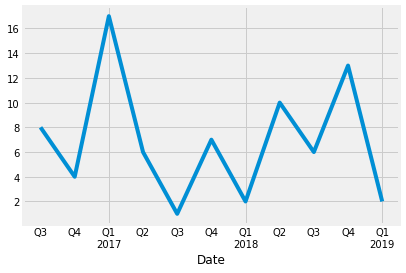

In [35]:
phishlist['swisscom'] = phishlist['URL'].str.contains('swisscom')
swisscom = phishlist[phishlist['swisscom']==True]
swisscom.resample('Q')['ID'].count().plot()

In [36]:
swisscom['swisscom'].count()

76

# Finding Top Level Domains

In [82]:
def toplevel(elem):
    elem = elem.replace('https://', '').replace('http://', '')
    elem = elem.split("/")[0].replace('www.','').strip()
    return elem

In [86]:
def countrydomain(elem):
    elem = elem.replace('https://', '').replace('http://', '')
    elem = elem.split("/")[0].replace('www.','').strip()
    elem = elem.split(".")[-1]
    elem = "."+elem
    return elem

In [87]:
phishlist['countryleveldomain'] = phishlist['URL'].apply(countrydomain)

In [92]:
phishlist['countryleveldomain'].value_counts().head(5)

.com    7258
.net     788
.org     484
.br      396
.ch      375
Name: countryleveldomain, dtype: int64

In [139]:
def realtoplevel(elem):
    if (elem.split('.')[-2] == 'co' or 
        elem.split('.')[-2] == 'com' or
        elem.split('.')[-2] == 'pe' or
        elem.split('.')[-2] == 'org' or
        elem.split('.')[-2] == 'edu' or
        elem.split('.')[-2] == 'ac' or
        elem.split('.')[-2] == 'gov'):
            minilst = elem.split('.')[-4:-1]
            elem = ''
            for e in minilst:
                e = e + "."
                elem += e 
            elem = elem[:-1]
    else:
        elem = elem.split('.')[-2]
    return elem

In [140]:
phishlist['temp'] = phishlist['URL'].apply(toplevel).apply(realtoplevel)

In [143]:
phishlist['finaltopleveldoms'] = phishlist['temp'] + phishlist['countryleveldomain']

In [146]:
phishlist['finaltopleveldoms'].value_counts().head()

.                    252
beget.tech           237
weebly.com           230
hosttech.eu           86
000webhostapp.com     81
Name: finaltopleveldoms, dtype: int64

In [150]:
# How many are Swiss
phishlist[phishlist['countryleveldomain']=='.ch']['temp'].value_counts().head()

myhostpoint    26
square7        13
grundlage       4
ew8qzmbh        4
theandco        4
Name: temp, dtype: int64

In [151]:
phishlist[phishlist['countryleveldomain']=='.ch']

,Date,ID,URL,Valid Phish,ubs,sunrise,swisscom,countryleveldomain,temp,finaltopleveldoms
Date,,,,,,,,,,
2016-07-21 06:29:00,Jul 21 2016 6:29 AM,4312307,http://treenet.ch/components/com_easypaypalbut...,Unknown,False,False,False,.ch,treenet,treenet.ch
2016-07-21 06:29:00,Jul 21 2016 6:29 AM,4312306,http://treenet.ch/components/com_easypaypalbut...,VALID PHISH,False,False,False,.ch,treenet,treenet.ch
2016-09-29 09:58:00,Sep 29 2016 9:58 AM,4497876,http://www.marvida.ch/new/yahoo/login.html,VALID PHISH,False,False,False,.ch,marvida,marvida.ch
2016-09-29 05:18:00,Sep 29 2016 5:18 AM,4497635,http://shop.wudang.ch/modules/mmm/grace/index....,Unknown,False,False,False,.ch,wudang,wudang.ch
2017-06-12 12:10:00,Jun 12 2017 12:10 PM,5048161,https://www.okoalsdrabes.ch/id/c2425129d061648...,Unknown,False,False,False,.ch,okoalsdrabes,okoalsdrabes.ch
2017-06-12 12:10:00,Jun 12 2017 12:10 PM,5048160,https://www.okoalsdrabes.ch/id/,VALID PHISH,False,False,False,.ch,okoalsdrabes,okoalsdrabes.ch
2016-09-25 14:18:00,Sep 25 2016 2:18 PM,4487266,http://dein-parfum.ch/css/wfonline/wfonline/id...,VALID PHISH,False,False,False,.ch,dein-parfum,dein-parfum.ch
2016-09-25 14:18:00,Sep 25 2016 2:18 PM,4487265,http://autoricardo-agb.ch,Unknown,False,False,False,.ch,autoricardo-agb,autoricardo-agb.ch
2016-10-23 10:08:00,Oct 23 2016 10:08 AM,4553090,http://www.web-app-whatsapp.ch/whatsappmesseng...,Unknown,False,False,False,.ch,web-app-whatsapp,web-app-whatsapp.ch


In [153]:
pd.set_option(".max_colwidth",-1)

In [154]:
phishlist[phishlist['countryleveldomain']=='.ch']

,Date,ID,URL,Valid Phish,ubs,sunrise,swisscom,countryleveldomain,temp,finaltopleveldoms
Date,,,,,,,,,,
2016-07-21 06:29:00,Jul 21 2016 6:29 AM,4312307,http://treenet.ch/components/com_easypaypalbuttons/views/buttons/tmpl/...,Unknown,False,False,False,.ch,treenet,treenet.ch
2016-07-21 06:29:00,Jul 21 2016 6:29 AM,4312306,http://treenet.ch/components/com_easypaypalbuttons/views/buttons/tmpl/...,VALID PHISH,False,False,False,.ch,treenet,treenet.ch
2016-09-29 09:58:00,Sep 29 2016 9:58 AM,4497876,http://www.marvida.ch/new/yahoo/login.html,VALID PHISH,False,False,False,.ch,marvida,marvida.ch
2016-09-29 05:18:00,Sep 29 2016 5:18 AM,4497635,http://shop.wudang.ch/modules/mmm/grace/index.htm...,Unknown,False,False,False,.ch,wudang,wudang.ch
2017-06-12 12:10:00,Jun 12 2017 12:10 PM,5048161,https://www.okoalsdrabes.ch/id/c2425129d0616482bda943ea3fb0f357/index....,Unknown,False,False,False,.ch,okoalsdrabes,okoalsdrabes.ch
2017-06-12 12:10:00,Jun 12 2017 12:10 PM,5048160,https://www.okoalsdrabes.ch/id/,VALID PHISH,False,False,False,.ch,okoalsdrabes,okoalsdrabes.ch
2016-09-25 14:18:00,Sep 25 2016 2:18 PM,4487266,http://dein-parfum.ch/css/wfonline/wfonline/identity.php...,VALID PHISH,False,False,False,.ch,dein-parfum,dein-parfum.ch
2016-09-25 14:18:00,Sep 25 2016 2:18 PM,4487265,http://autoricardo-agb.ch,Unknown,False,False,False,.ch,autoricardo-agb,autoricardo-agb.ch
2016-10-23 10:08:00,Oct 23 2016 10:08 AM,4553090,http://www.web-app-whatsapp.ch/whatsappmessenger-schweizerische/7f46fb...,Unknown,False,False,False,.ch,web-app-whatsapp,web-app-whatsapp.ch


In [19]:
phishlist[phishlist['Valid Phish']=='INVALID']

,Date,ID,URL,Valid Phish,sunrise
Date,,,,,
2018-10-22 14:36:00,Oct 22 2018 2:36 PM,5822617,https://banking.credem.it/newvir/login/login,INVALID,False
2015-12-02 08:51:00,Dec 2 2015 8:51 AM,3657909,https://www.romande-energie.ch/particuliers/el...,INVALID,False
2015-08-29 06:26:00,Aug 29 2015 6:26 AM,3426954,http://www.anibis.ch/default.aspx?wl=1&lng;=fr,INVALID,False
2016-07-21 07:21:00,Jul 21 2016 7:21 AM,4312401,https://www.mastercard.ch/de-ch.html,INVALID,False
2016-10-03 10:24:00,Oct 3 2016 10:24 AM,4506622,https://www.postfinance.ch,INVALID,False
2017-07-27 04:53:00,Jul 27 2017 4:53 AM,5120236,https://www.ricardo.ch/,INVALID,False
2018-08-27 12:39:00,Aug 27 2018 12:39 PM,5764536,http://blocked.transip.nl/,INVALID,False
2017-11-16 07:50:00,Nov 16 2017 7:50 AM,5336172,https://sellercentral.amazon.de/ap/signin?open...,INVALID,False
2018-02-22 19:00:00,Feb 22 2018 7:00 PM,5491012,http://batterymart.com.au/,INVALID,False


In [58]:
phishlist.resample('D')['URL'].count().mean()

10.0184361093452